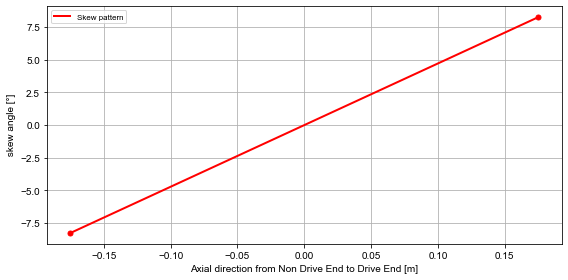

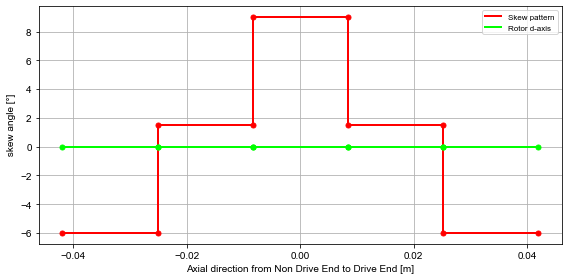

In [5]:
from os import chdir
chdir('..')
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from pyleecan.Classes.Skew import Skew
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Output import Output
from pyleecan.Classes.SliceModel import SliceModel
from pyleecan.Classes.Magnetics import Magnetics
from numpy import pi, sin

# Load machines
Toyota_Prius = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
SCIM_001 = load(join(DATA_DIR, "Machine", "SCIM_001.json"))

# Define lamination skew (optional): "linear", "vshape", "function"
SCIM_001.rotor.skew = Skew(type_skew="linear", rate=36/28, is_step=False)
Toyota_Prius.rotor.skew = Skew(type_skew="vshape", rate=2, is_step=True, Nstep=5)

# Plot skew
SCIM_001.rotor.skew.plot()
Toyota_Prius.rotor.skew.plot()

In [6]:
# Parametrize skew model: "uniform", "gauss" or "user-defined"
slice_model = SliceModel(type_dist="gauss", Nslices=7)

# Compute slices and plot
slice_model.plot()

TypeError: __init__() got an unexpected keyword argument 'type_dist'